In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt          
import seaborn as sns   

In [5]:
df = pd.read_csv('AAPL.csv')

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df['Daily Return'] = (df['Close'] - df['Open']) / df['Open']
df['10-Day MA'] = df['Close'].rolling(window=10).mean()
df['30-Day MA'] = df['Close'].rolling(window=30).mean()

In [10]:
# To describe the data
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return,10-Day MA,30-Day MA
count,9909,9909.000000,9909.000000,9909.000000,9909.000000,9909.000000,9.909000e+03,9909.000000,9900.000000,9880.000000
mean,2000-07-30 08:33:08.010899200,32.606849,32.936079,32.277560,32.618030,30.576570,8.582916e+07,-0.000128,32.534677,32.336510
min,1980-12-12 00:00:00,0.198661,0.198661,0.196429,0.196429,0.155638,3.472000e+05,-0.243523,0.212946,0.227679
25%,1990-10-02 00:00:00,1.071429,1.089286,1.048571,1.071429,0.917643,3.304230e+07,-0.011632,1.072656,1.088004
50%,2000-07-21 00:00:00,1.729286,1.758929,1.696429,1.732143,1.466154,5.766490e+07,0.000000,1.717071,1.715857
75%,2010-05-28 00:00:00,35.799999,36.265713,35.328571,35.761429,31.042374,1.069992e+08,0.010836,36.178893,36.231488
max,2020-04-01 00:00:00,324.739990,327.850006,323.350006,327.200012,327.200012,1.855410e+09,0.192661,322.748999,317.981000
std,NaN,58.415759,59.001576,57.883037,58.471899,56.746275,8.597195e+07,0.023515,58.293721,57.845294


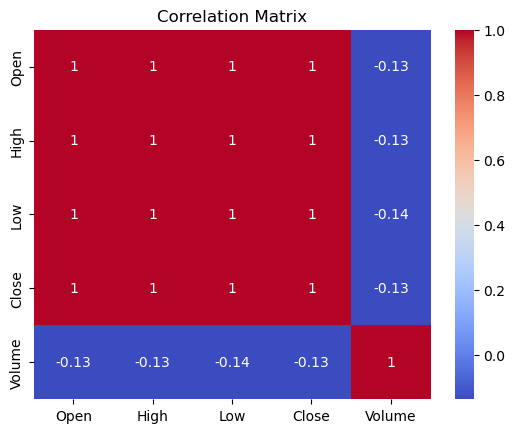

In [8]:
# To Check correlations between variables

corr = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

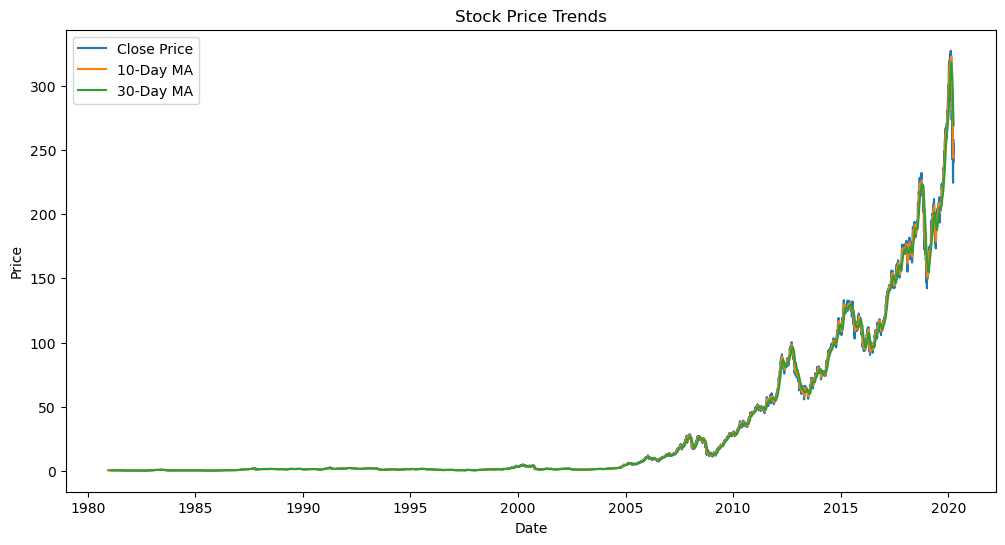

In [9]:
# Line Plot for stock price trends

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['10-Day MA'], label='10-Day MA')
plt.plot(df['Date'], df['30-Day MA'], label='30-Day MA')
plt.title('Stock Price Trends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


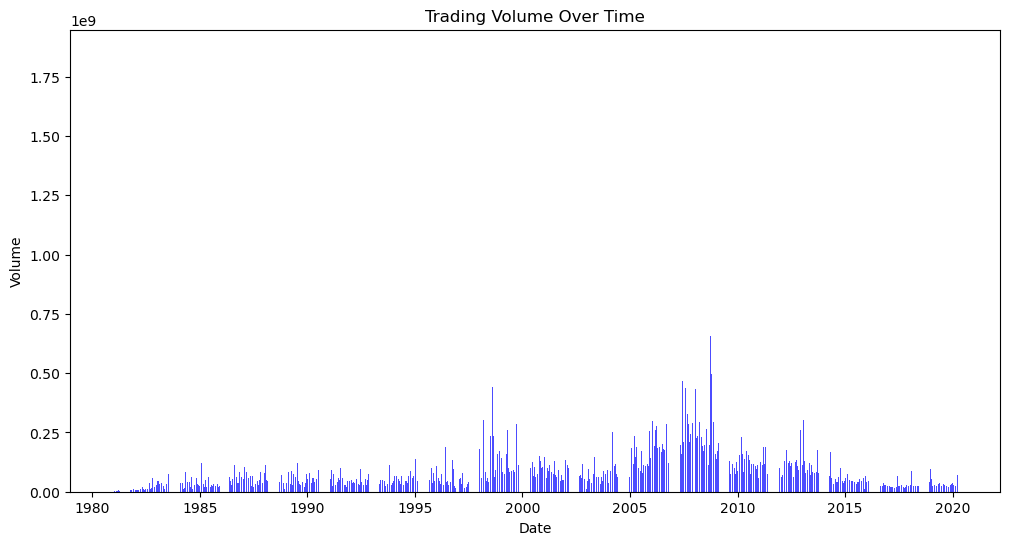

In [12]:
# Volume trends 

plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Volume'], color='blue', alpha=0.7)
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


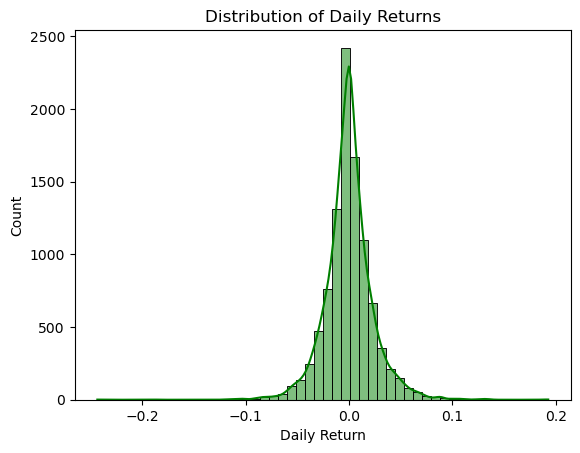

In [13]:
# Distribution of Daily Returns

sns.histplot(df['Daily Return'], kde=True, bins=50, color='green')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.show()


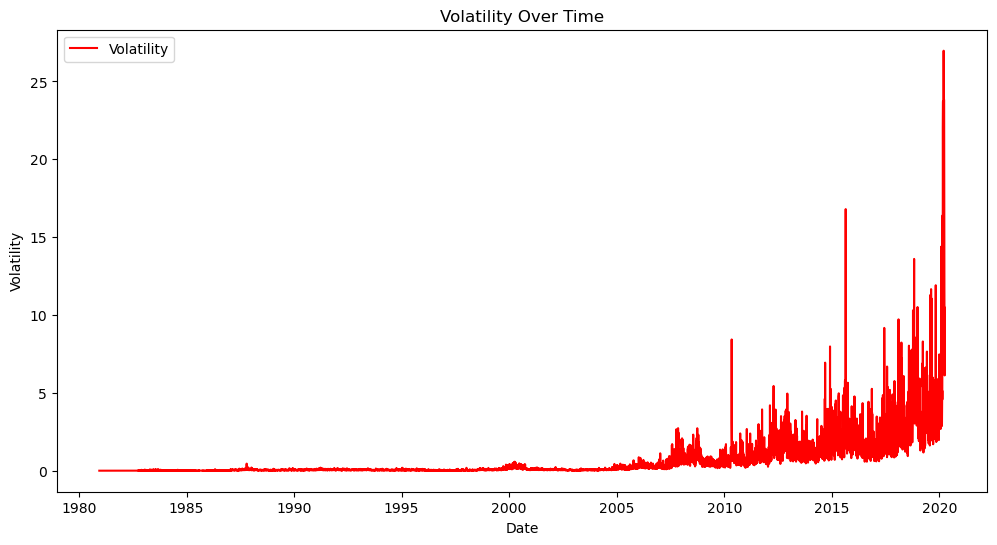

In [14]:
# Volatility (High-Low difference)

df['Volatility'] = df['High'] - df['Low']
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volatility'], label='Volatility', color='red')
plt.title('Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


/tmp/ipykernel_7249/3839538629.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_volume.index, y=monthly_volume.values, palette='viridis')


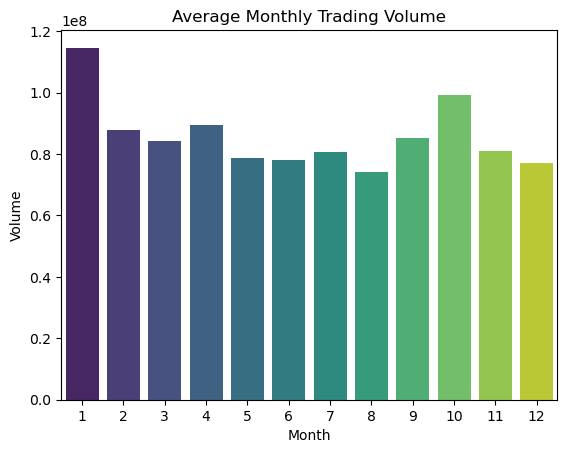

In [15]:
# which months/seasons have higher trading activity 

df['Month'] = df['Date'].dt.month
monthly_volume = df.groupby('Month')['Volume'].mean()
sns.barplot(x=monthly_volume.index, y=monthly_volume.values, palette='viridis')
plt.title('Average Monthly Trading Volume')
plt.xlabel('Month')
plt.ylabel('Volume')
plt.show()


In [16]:
df.to_csv('processed_stock_data.csv', index=False)
